In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import h5py
import calendar

In [6]:
fig_width = 6.84                        # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = 5.0      # height in inches
dpi = 300.0  
# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'axes.labelsize': 12,
          'axes.titlesize': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

In [7]:
pal = sns.color_palette("colorblind")
pal.as_hex()[0:5]

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc']

In [8]:
df_toc = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/TOC_data_Hopland_Avena.csv")

In [9]:
df_toc.head()

,Sample,TOC,TOCmM,TOCsim
0,week3,1.54224,0.128402,0.105708
1,week3,1.18336,0.098523,0.105708
2,week3,1.08112,0.090011,0.105708
3,week3,1.11136,0.092529,0.105708
4,week6,4.92000,0.409625,0.140931


<Axes: >

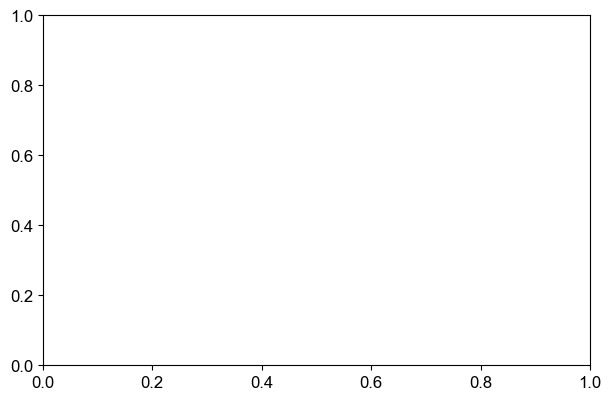

In [10]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

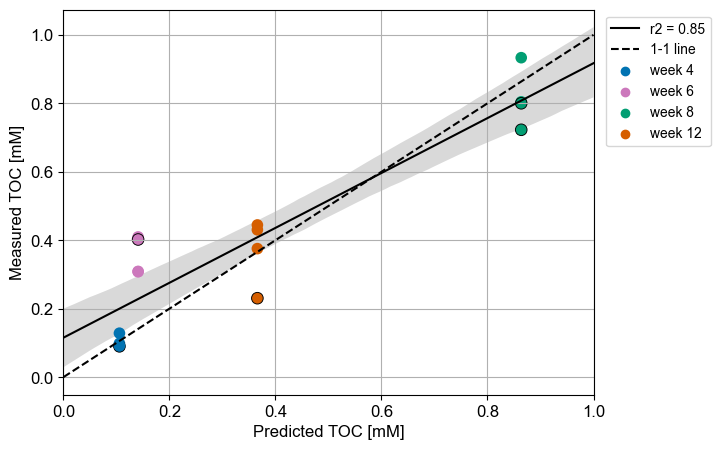

In [14]:
ax = plt.gca()
ax = sns.regplot(x="TOCsim", y="TOCmM", data=df_toc.replace(["week3", "week6", "week9", "week12"], ["week 4", "week 6", "week 8", "week 12"]), color='k', marker="s", scatter_kws={"s": 100, "edgecolor":'b', 'facecolor':"none"}, line_kws={"lw": 1.5, "color":'k'}, label="r2 = 0.85", truncate=False, scatter=False)
x = np.linspace(0,1,100)
y1 = x
plt.plot(x, y1, '--', c='k', label="1-1 line")
ax = sns.scatterplot(x="TOCsim", y="TOCmM", data=df_toc.replace(["week3", "week6", "week9", "week12"], ["week 4", "week 6", "week 8", "week 12"]), hue="Sample", palette=['#0173b2', '#cc78bc', '#029e73', '#d55e00'], edgecolor=["none", "none", "k"], s=70)
plt.grid(True)
plt.legend(title="", bbox_to_anchor=(1.01, 1))
plt.xlabel("Predicted TOC [mM]")
plt.ylabel("Measured TOC [mM]")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/benchmark_avena2018.svg", format='svg')

In [8]:
f = h5py.File("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/output/timeseries_avena2018.jld2", "r")
rate2018 = f["rateseries_2018"][:]
toc2018 = f["totalCseries_2018"][:]

In [10]:
month_hours = 30*24
months = np.arange(1, step=month_hours, stop=rate2018.size)
m_str=[calendar.month_name[int(x/(30*24))+1] for x in months[0:-1]] 

<Axes: >

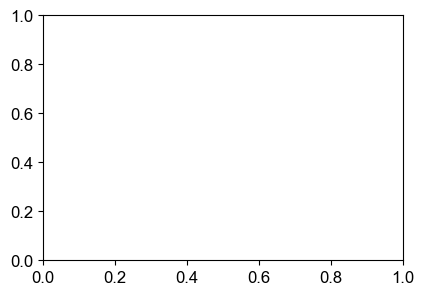

In [11]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

In [12]:
rate2018_night = np.interp(np.arange(1,8838,1), np.arange(1,8838,24), rate2018[1:8838:24])
rate2018_day = np.interp(np.arange(1,8838,1), np.arange(1+12,8838,24), rate2018[1+12:8838:24])

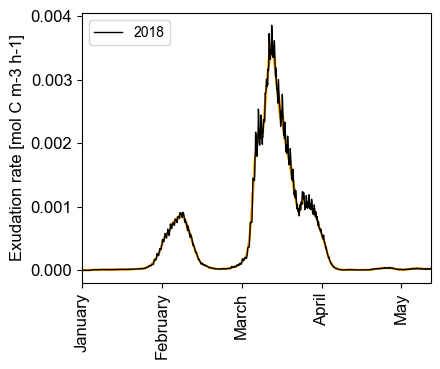

In [13]:
ax = plt.gca()
plt.plot(rate2018_day, color="orange")
plt.plot(rate2018_night, color="orange")
plt.plot(rate2018, lw=1, color="black", label="2018")
#plt.axvline(x=4384 , color = 'black', linestyle = '--', lw=1, label="")
ax.set_xticks(months[0:-1])
ax.set_xticklabels(m_str)
ax.set_xlim(1, 3145)
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90)
plt.ylabel("Exudation rate [mol C m-3 h-1]")
plt.legend(loc="upper left")
#plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/rateC_avena2018_zoom.svg", format='svg')

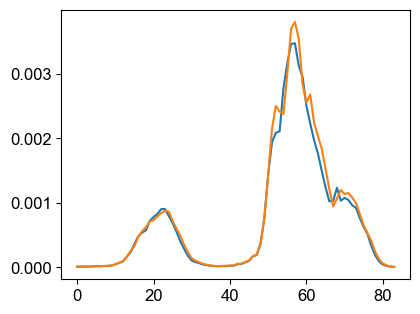

In [394]:
plt.plot(rate2018[345+12:345+24*7*12:24])
plt.plot(rate2018[345:345+24*7*12:24])

In [14]:
f = h5py.File("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/output/timeseries_avena2013.jld2", "r")
rate2013 = f["rateseries_2013"][:]
toc2013 = f["totalCseries_2013"][:]

In [431]:
months = np.arange(1, step=month_hours, stop=rate2013.size)
m_str=[calendar.month_name[int(x/(30*24))+1] for x in months[0:-1]] 

In [15]:
rate2013_night = np.interp(np.arange(1,8838,1), np.arange(1,8838-48,24), rate2013[1+12:8838:24])
rate2013_day = np.interp(np.arange(1,8838,1), np.arange(1,8838-48,24), rate2013[1+12:8838:24])

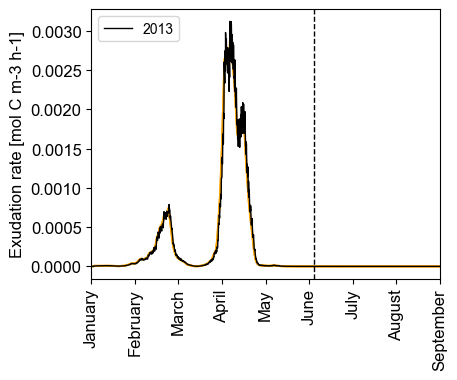

In [459]:
ax = plt.gca()
plt.plot(rate2013_day, color="orange")
plt.plot(rate2013_night, color="orange")
plt.plot(rate2013, lw=1, color="black", label="2013")
plt.axvline(x=3740 , color = 'black', linestyle = '--', lw=1, label="")
ax.set_xticks(months[0:-1])
ax.set_xticklabels(m_str)
ax.set_xlim(1, 5845)
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90)
plt.ylabel("Exudation rate [mol C m-3 h-1]")
plt.legend(loc="upper left")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/rateC_avena2013.svg", format='svg')

In [16]:
f = h5py.File("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/output/timeseries_avena2012.jld2", "r")
rate2012 = f["rateseries_2012"][:]
toc2012 = f["totalCseries_2012"][:]

In [462]:
months = np.arange(1, step=month_hours, stop=rate2012.size)
m_str=[calendar.month_name[int(x/(30*24))+1] for x in months[0:-1]] 

In [17]:
rate2012_night = np.interp(np.arange(1,8802,1), np.arange(1,8802,24), rate2012[1:8802:24])
rate2012_day = np.interp(np.arange(1,8802,1), np.arange(1+12,8802,24), rate2012[1+12:8802:24])

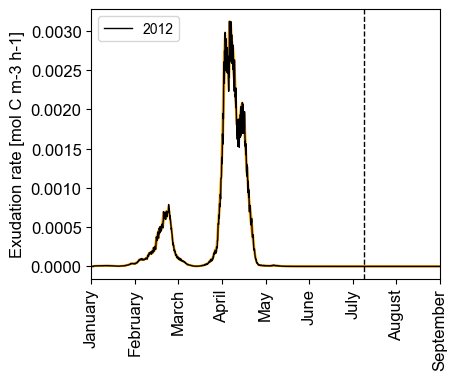

In [476]:
ax = plt.gca()
plt.plot(rate2012_day, color="orange")
plt.plot(rate2012_night, color="orange")
plt.plot(rate2012, lw=1, color="black", label="2012")
plt.axvline(x=4578 , color = 'black', linestyle = '--', lw=1, label="")
ax.set_xticks(months[0:-1])
ax.set_xticklabels(m_str)
ax.set_xlim(1, 5845)
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90)
plt.ylabel("Exudation rate [mol C m-3 h-1]")
plt.legend(loc="upper left")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/rateC_avena2012.svg", format='svg')

In [18]:
f = h5py.File("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/output/timeseries_avena2006.jld2", "r")
rate2006 = f["rateseries_2006"][:]
toc2006 = f["totalCseries_2006"][:]

In [478]:
months = np.arange(1, step=month_hours, stop=rate2006.size)
m_str=[calendar.month_name[int(x/(30*24))+1] for x in months[0:-1]] 

In [19]:
rate2006_night = np.interp(np.arange(1,8766,1), np.arange(1,8766,24), rate2006[1:8766:24])
rate2006_day = np.interp(np.arange(1,8766,1), np.arange(1+12,8766,24), rate2006[1+12:8766:24])

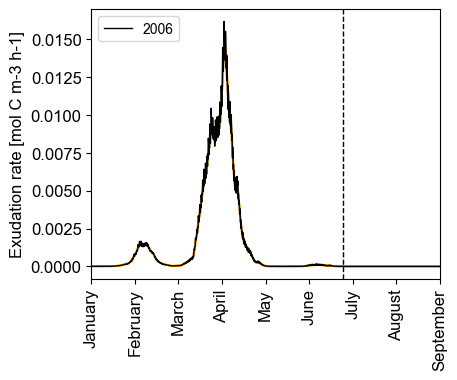

In [482]:
ax = plt.gca()
plt.plot(rate2006_day, color="orange")
plt.plot(rate2006_night, color="orange")
plt.plot(rate2006, lw=1, color="black", label="2006")
plt.axvline(x=4214 , color = 'black', linestyle = '--', lw=1, label="")
ax.set_xticks(months[0:-1])
ax.set_xticklabels(m_str)
ax.set_xlim(1, 5845)
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90)
plt.ylabel("Exudation rate [mol C m-3 h-1]")
plt.legend(loc="upper left")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/rateC_avena2006.svg", format='svg')

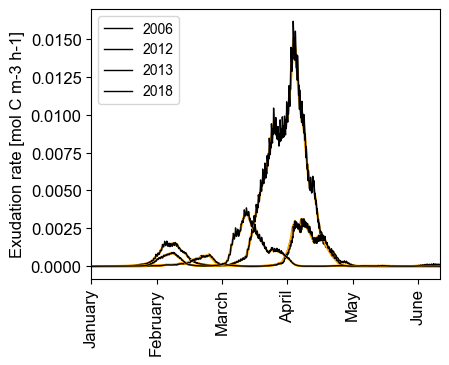

In [25]:
ax = plt.gca()
plt.plot(rate2006_day, color="orange")
plt.plot(rate2006_night, color="orange")
plt.plot(rate2006, lw=1, color="black", label="2006")
plt.plot(rate2012_day, color="orange")
plt.plot(rate2012_night, color="orange")
plt.plot(rate2012, lw=1, color="black", label="2012")
plt.plot(rate2013_day, color="orange")
plt.plot(rate2013_night, color="orange")
plt.plot(rate2013, lw=1, color="black", label="2013")
plt.plot(rate2018_day, color="orange")
plt.plot(rate2018_night, color="orange")
plt.plot(rate2018, lw=1, color="black", label="2018")
#plt.axvline(x=4214 , color = 'black', linestyle = '--', lw=1, label="")
ax.set_xticks(months[0:-1])
ax.set_xticklabels(m_str)
ax.set_xlim(1, 3845)
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90)
plt.ylabel("Exudation rate [mol C m-3 h-1]")
plt.legend(loc="upper left")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/rateC_avena2006_2012_2013_2018.svg", format='svg')

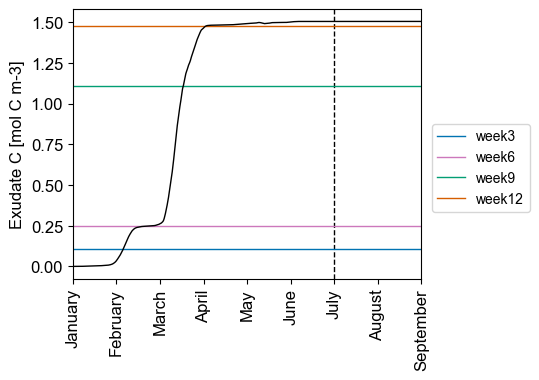

In [265]:
ax = plt.gca()
plt.axvline(x=4384 , color = 'black', linestyle = '--', lw=1, label="")
plt.axhline(y=0.1057 , color = '#0173b2', linestyle = '-', lw=1, label="week3")
plt.axhline(y=0.1057+0.1409 , color = '#cc78bc', linestyle = '-', lw=1, label="week6")
plt.axhline(y=0.1057+0.1409+0.864 , color = '#029e73', linestyle = '-', lw=1, label="week9")
plt.axhline(y=0.1057+0.1409+0.864+0.366 , color = '#d55e00', linestyle = '-', lw=1, label="week12")
plt.plot(toc2018, lw=1, color="black", label="")
ax.set_xticks(months[0:-1])
ax.set_xticklabels(m_str)
ax.set_xlim(1, 5845)
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90)
plt.ylabel("Exudate C [mol C m-3]")
plt.legend(title="", bbox_to_anchor=(1.01, 0.6))
#plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/cumulativeC_avena2018.svg", format='svg')

In [5]:
df_avena = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/output/stats_avena_2018_2013_2012_2006.csv")

In [6]:
df_avena.head()

,weeks,weekC,weekCroot,rateC,years,totalC,starthr,deadhr
0,week3,0.105708,0.680010,0.000049,2018,1.504482,105466,4384
1,week3,0.189019,0.328744,0.000369,2018,1.504482,105466,4384
2,week3,0.188485,0.799600,0.000369,2018,1.504482,105466,4384
3,week3,0.038514,0.214542,0.000732,2018,1.504482,105466,4384
4,week6,0.140931,0.838808,0.000082,2013,1.298155,62328,3740


In [17]:
df_avena.drop(df_avena[df_avena.weeks == "week6"].index, inplace=True)

In [7]:
df_avena["rateCmr"] = df_avena["rateC"]*3.822375781622702e-8*12.011*24*1e6/0.8e-2

In [37]:
df_avena["weekCrootg"] = df_avena["weekCroot"]*1.2e-3*12.011
df_avena["weekCg"] = df_avena["weekC"]*1.2e-3*12.011

In [63]:
fig_width = 6.84                        # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_height = 5.0      # height in inches
dpi = 300.0  
# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'axes.labelsize': 12,
          'axes.titlesize': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

<Axes: >

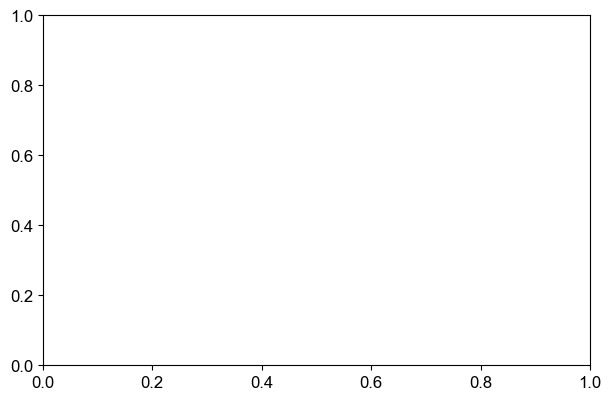

In [64]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

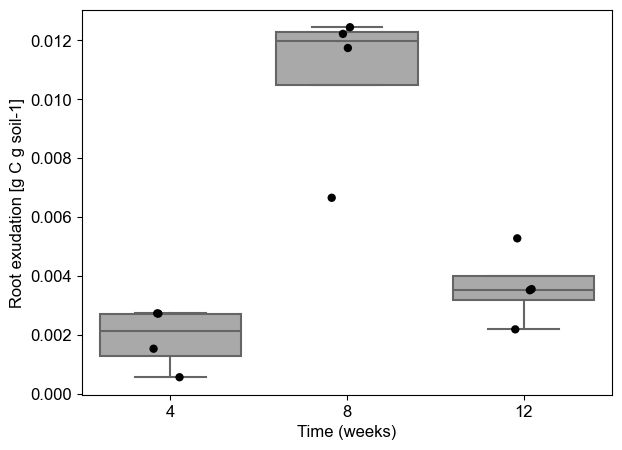

In [65]:
ax = sns.stripplot(x="weeks", y="weekCg", data=df_avena.replace(["week3", "week9", "week12"], [4, 8, 12]), dodge=False, size=6, label='', palette=['k', 'k', 'k'])
ax = sns.boxplot(x="weeks", y="weekCg", data=df_avena.replace(["week3", "week9", "week12"], [4, 8, 12]), palette=['#A9A9A9', '#A9A9A9', '#A9A9A9'], showfliers=False)
plt.ylabel("Root exudation [g C g soil-1]")
plt.xlabel("Time (weeks)")

handles, labels = ax.get_legend_handles_labels()
handles = [h for h, lbl, prev in zip(handles, labels, [None] + labels) if lbl != prev]
ax.legend(handles=handles, loc="center", fontsize=8, frameon=False)
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/exudation_avena_2018_2013_2012_2006.svg", format='svg')

/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

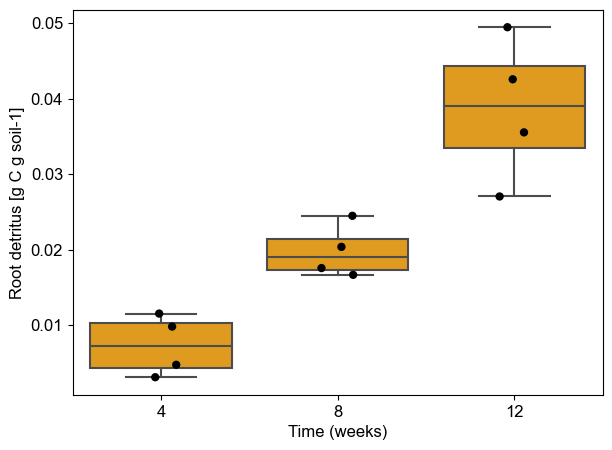

In [66]:
ax = sns.stripplot(x="weeks", y="weekCrootg", data=df_avena.replace(["week3", "week9", "week12"], [4, 8, 12]), dodge=False, size=6, label='', palette=['k', 'k', 'k'])
ax = sns.boxplot(x="weeks", y="weekCrootg", data=df_avena.replace(["week3", "week9", "week12"], [4, 8, 12]), palette=['#FEA500', '#FEA500', '#FEA500', '#FEA500'], showfliers=False)
plt.ylabel("Root detritus [g C g soil-1]")
plt.xlabel("Time (weeks)")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/detritus_avena_2018_2013_2012_2006.svg", format='svg')

<Axes: >

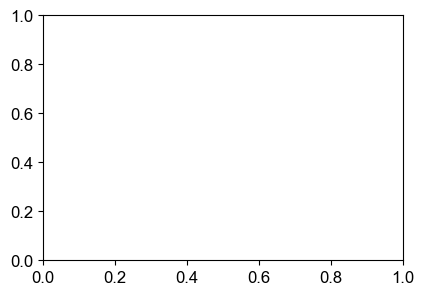

In [486]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

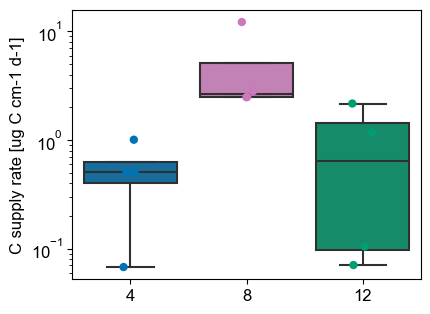

In [61]:
ax = sns.stripplot(x="weeks", y="rateCmr", data=df_avena.replace(["week3", "week9", "week12"], [4, 8, 12]), dodge=False, size=6, label='', palette=['#0173b2', '#cc78bc', '#029e73', '#d55e00'])
ax = sns.boxplot(x="weeks", y="rateCmr", data=df_avena.replace(["week3", "week9", "week12"], [4, 8, 12]), palette=['#0173b2', '#cc78bc', '#029e73', '#d55e00'], showfliers=False)
plt.yscale("log")
plt.ylabel("C supply rate [ug C cm-1 d-1]")
plt.xlabel("")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/C_supply_avena_2018_2013_2012_2006.svg", format='svg')

<Axes: >

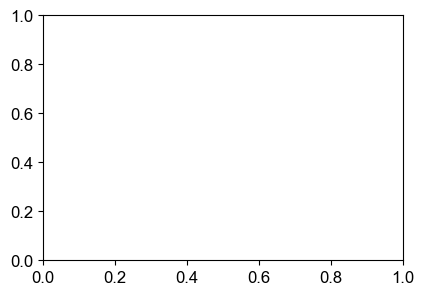

In [288]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


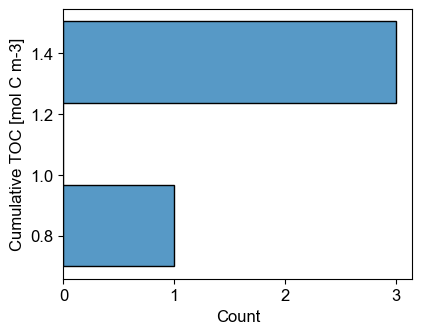

In [303]:
ax = sns.histplot(data=df_avena.groupby("weeks").median(), y="totalC")
plt.ylabel("Cumulative TOC [mol C m-3]")
plt.xlabel("Count")
plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/avena/cumulative_TOC_avena_2018_2013_2012_2006.svg", format='svg')

In [1]:
df_sim = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/output/rhizosphere_model_0_2006.csv")

NameError: name 'pd' is not defined

In [ ]:
df_sim_filter = df_sim[(df_sim["sample"] == "week3") | (df_sim["sample"] == "week6") | (df_sim["sample"] == "week9") | (df_sim["sample"] == "week12")]
df_sim_filter = df_sim_filter[(df_sim_filter["relabundance"] <0.75)]

In [2]:
df_sim_filter

NameError: name 'df_sim_filter' is not defined

<Axes: xlabel='sample'>

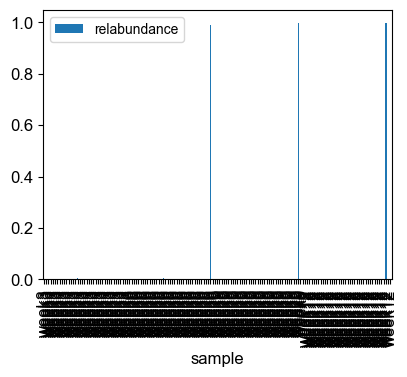

In [705]:
df_sim_filter.set_index('sample').plot(kind='bar', stacked=True) ## Plot

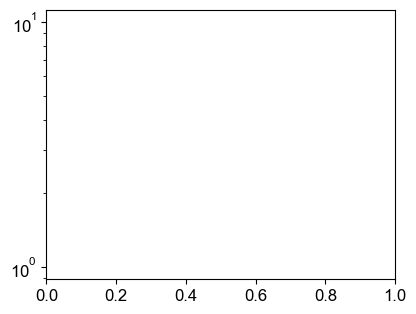

In [733]:
so.Plot(df_sim_filter, x="sample", y="relabundance", color="response").add(so.Bar())
plt.yscale('log')

In [738]:
df_sim_filter

,response,sample,relabundance
39,positive,week3,1.456174e-04
40,positive,week3,2.752634e-03
41,negative,week3,1.757832e-05
42,undefined,week3,1.015194e-06
43,undefined,week3,3.646387e-06
...,...,...,...
190,undefined,week12,1.054533e-05
191,undefined,week12,3.416987e-06
192,positive,week12,9.988082e-01
193,positive,week12,9.127866e-09


/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

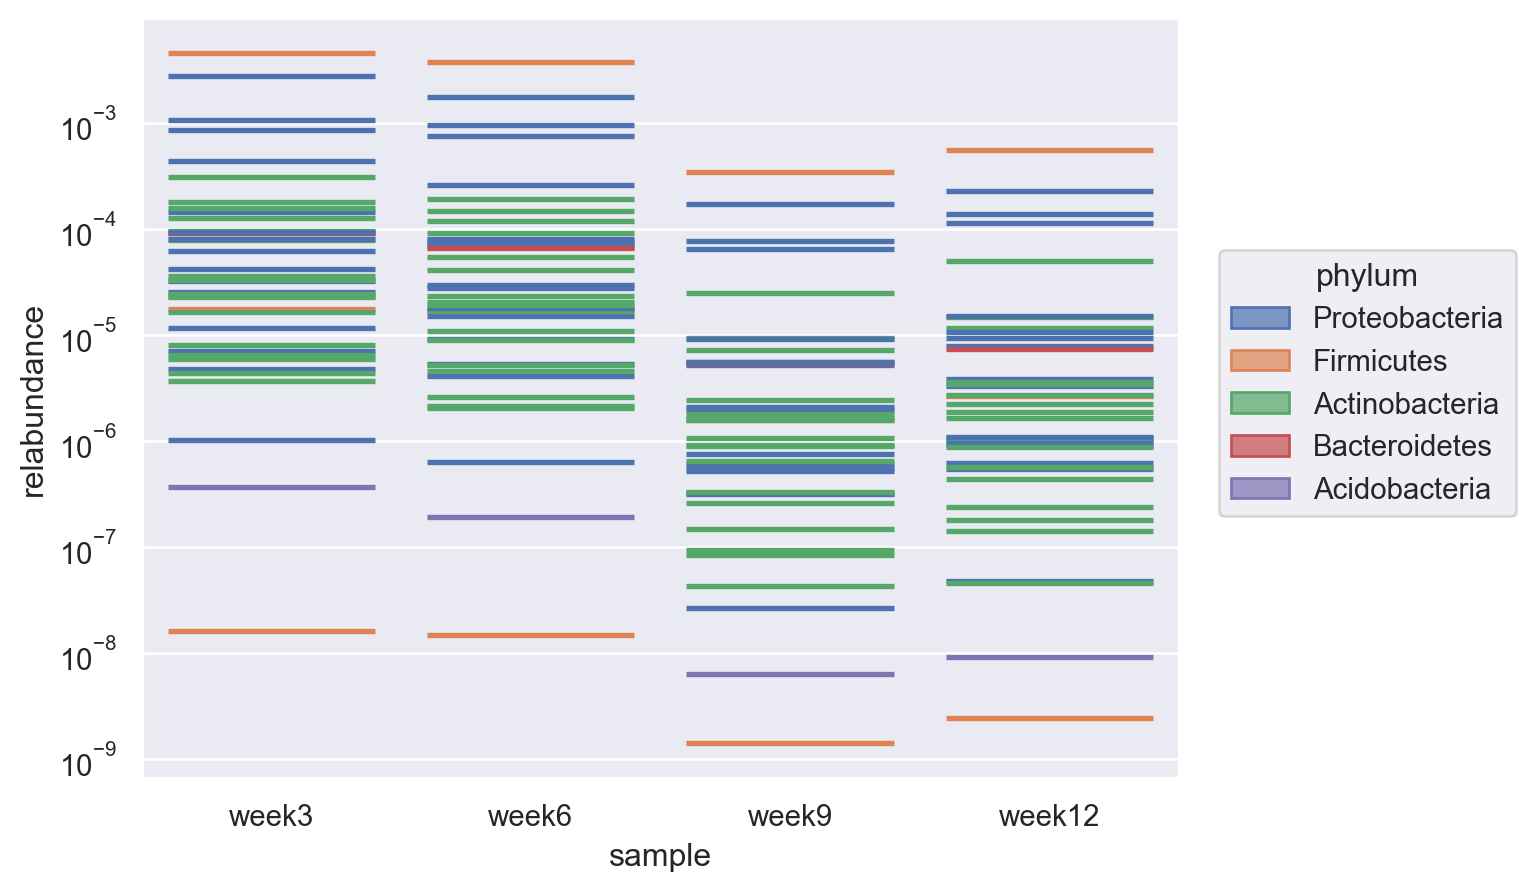

In [768]:

g = so.Plot(df_sim_filter, x="sample", y="relabundance", color="phylum").add(so.Bar())
g.scale(y="log")



In [707]:
import seaborn.objects as so 

In [660]:
df_sim["logab"] = np.log10(df_sim["relabundance"])
df_sim["logmeas"] = np.log10(df_sim["measurement"])

/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

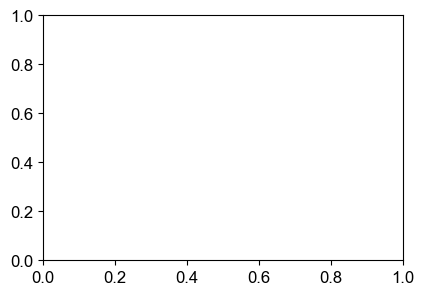

In [661]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

<Axes: xlabel='sample'>

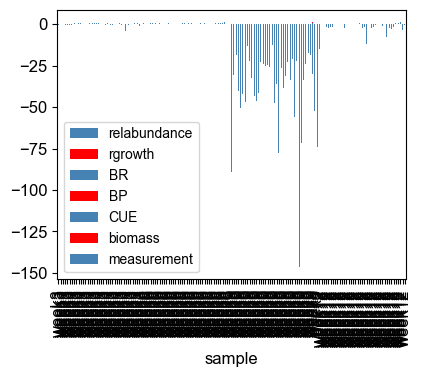

In [642]:
df_sim_filter.set_index('sample').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

In [643]:
tips = sns.load_dataset("tips")


In [645]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [646]:
total = tips.groupby('day')['total_bill'].sum().reset_index()

/var/folders/yc/03dd99bx2g37hqpr63n4yc600000gp/T/ipykernel_38735/2479030589.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = tips.groupby('day')['total_bill'].sum().reset_index()


/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


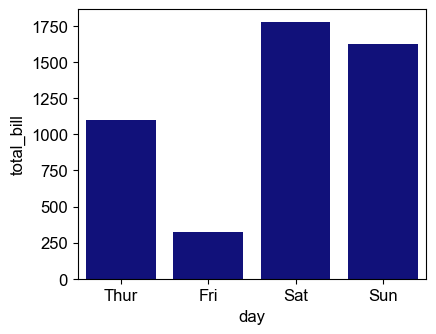

In [647]:
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

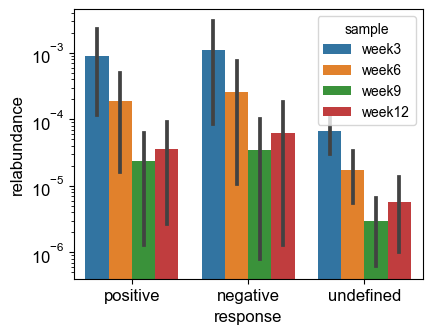

In [780]:
ax = plt.gca()
ax = sns.barplot(x="response", y="relabundance", hue="sample", data=df_sim_filter, ax=ax)
plt.yscale('log')

In [654]:
total = df_sim_filter.groupby('sample')['relabundance'].sum().reset_index()

In [665]:
Proteobacteria = df_sim_filter[df_sim_filter.phylum=='Proteobacteria']
Firmicutes = df_sim_filter[df_sim_filter.phylum=='Firmicutes']

In [671]:
bar1 = sns.barplot(x="sample",  y="relabundance", data=total, color='darkblue')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3385103929.py, line 2)

/var/folders/yc/03dd99bx2g37hqpr63n4yc600000gp/T/ipykernel_38735/1509918762.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar2 = sns.barplot(x="sample", y="relabundance", data=Firmicutes, estimator=sum, ci=None,  color='lightblue')
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future

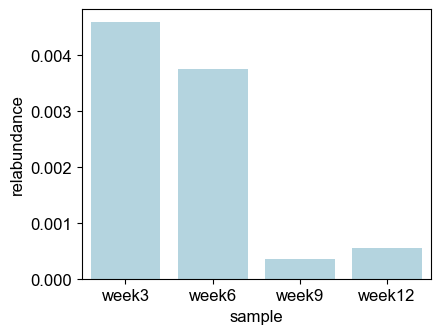

/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4657: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))


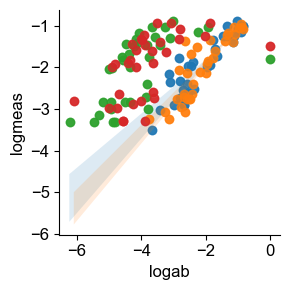

In [555]:
g = sns.FacetGrid(df_sim, hue='sample')
g.map(plt.scatter, "logab", "logmeas", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.map(sns.regplot, "logaba", "logmeas")

/var/folders/yc/03dd99bx2g37hqpr63n4yc600000gp/T/ipykernel_38735/2954611464.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = tips.groupby('day')['total_bill'].sum().reset_index()
/var/folders/yc/03dd99bx2g37hqpr63n4yc600000gp/T/ipykernel_38735/2954611464.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

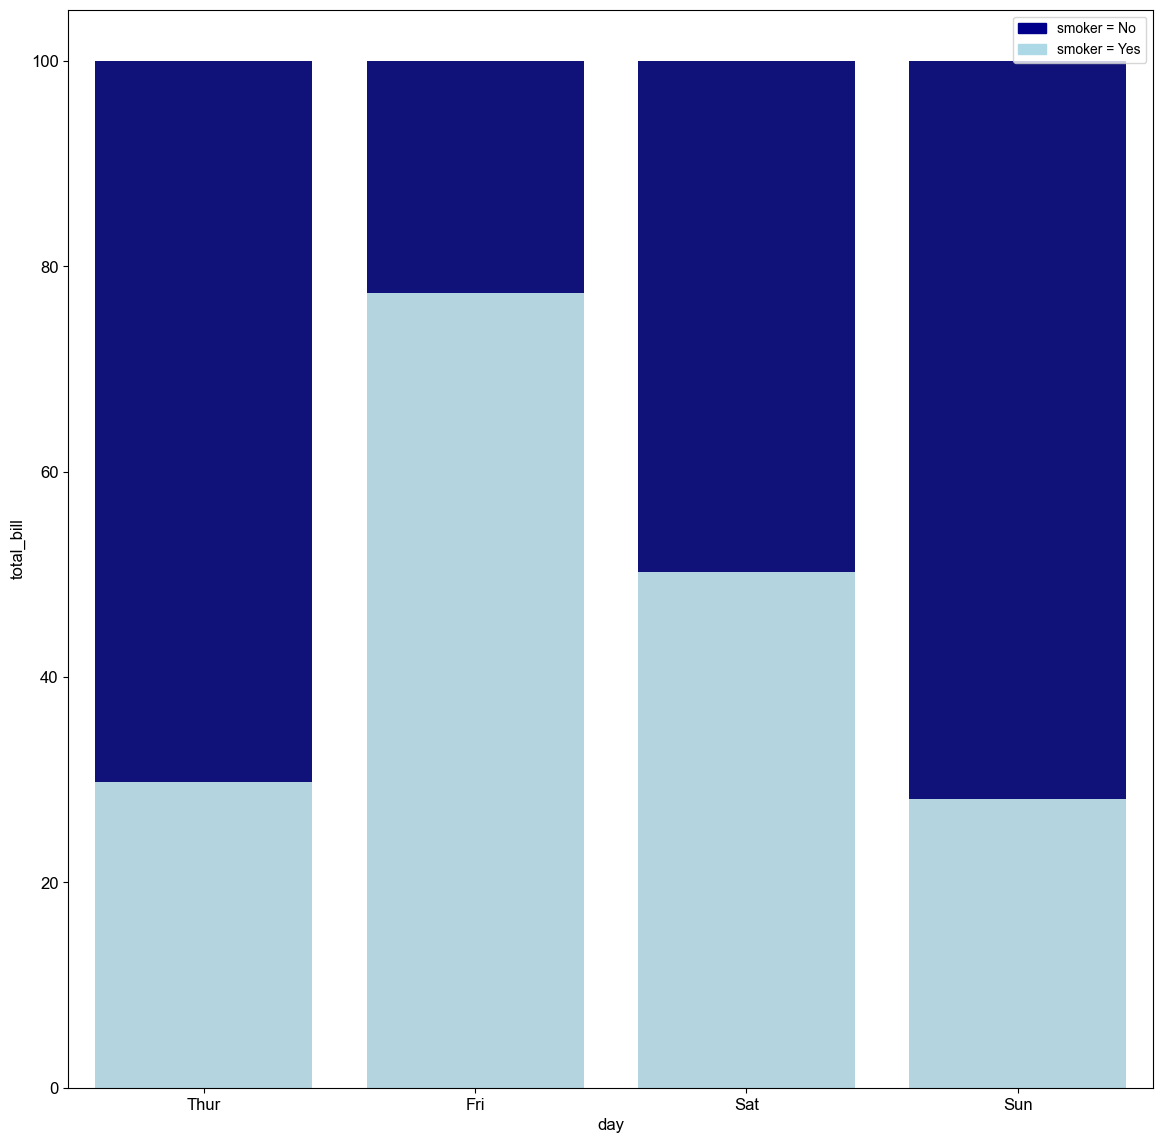

In [674]:
# load dataset
tips = sns.load_dataset("tips")

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
total = tips.groupby('day')['total_bill'].sum().reset_index()
smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [697]:
total = df_sim_filter.groupby('sample')['relabundance'].sum().reset_index()

In [698]:
positive = df_sim_filter[df_sim_filter.response=='positive'].groupby('sample')['relabundance'].sum().reset_index()

In [682]:
positive['relabundance'] = [i / j * 100 for i,j in zip(positive['relabundance'], total['relabundance'])]
total['relabundance'] = [i / j * 100 for i,j in zip(positive['relabundance'], total['relabundance'])]

/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/yc/03dd99bx2g37hqpr63n4yc600000gp/T/ipykernel_38735/2419737882.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar2

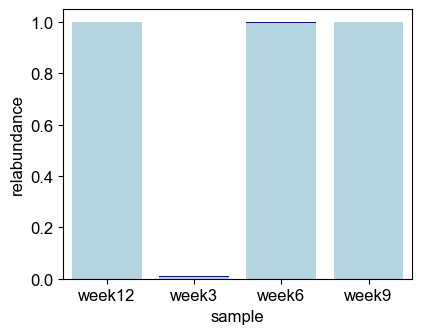

In [699]:
bar1 = sns.barplot(x="sample",  y="relabundance", data=total, color='darkblue')
bar2 = sns.barplot(x="sample", y="relabundance", data=positive, estimator=sum, ci=None,  color='lightblue')

/var/folders/yc/03dd99bx2g37hqpr63n4yc600000gp/T/ipykernel_38735/446868384.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar2 = sns.barplot(x="sample", y="relabundance", data=positive, estimator=sum, ci=None,  color='lightblue')
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/glmarschmann/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

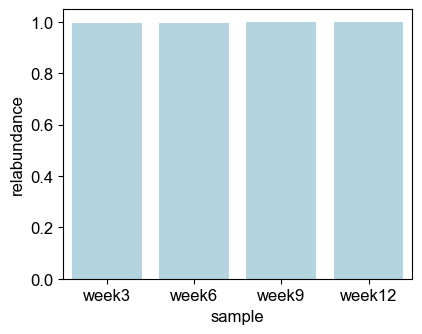

In [692]:
positive = df_sim_filter[df_sim_filter.response=='positive']

In [694]:
positive

,phylum,isolate,response,sample,relabundance,rgrowth,BR,BP,CUE,biomass,measurement,logab,logmeas
39,Proteobacteria,Bradyrhizobium sp. URHA0002,positive,week3,1.456174e-04,0.001165,2.682891e-09,-1.345526e-08,-0.537259,4.911963e-06,0.098142,-3.836787,-1.008143
40,Proteobacteria,Bradyrhizobium sp. URHA0013,positive,week3,2.752634e-03,0.002135,3.698776e-07,-4.744351e-07,-0.537387,9.285182e-05,0.098762,-2.560252,-1.005412
44,Proteobacteria,Comamonadaceae bacterium URHA0028,positive,week3,2.565818e-05,0.001211,5.754942e-10,-2.330701e-09,-0.137071,8.655012e-07,0.045511,-4.590774,-1.341885
47,Proteobacteria,Caulobacter sp. URHA0033,positive,week3,9.067089e-05,0.002437,7.767042e-09,-1.125248e-08,-0.376848,3.058509e-06,0.016409,-4.042532,-1.784927
49,Actinobacteria,Streptomyces sp. URHA0041,positive,week3,2.407964e-05,0.001796,7.478135e-10,-2.246363e-09,-0.269021,8.122540e-07,0.013003,-4.618350,-1.885953
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Actinobacteria,Mycobacterium sp. URHD0025,positive,week12,4.534104e-08,-0.000132,3.299622e-13,-8.629156e-12,-45.124710,2.329543e-09,0.010172,-7.343509,-1.992588
186,Proteobacteria,Sphingomonas sp. URHD0057,positive,week12,1.087124e-06,-0.000129,3.442505e-11,-1.760708e-10,-328.354056,5.585454e-08,0.045905,-5.963721,-1.338139
188,Proteobacteria,Bradyrhizobium sp. URHD0069,positive,week12,1.498698e-05,-0.000134,8.460686e-11,-2.064095e-09,-98.351430,7.700048e-07,0.116588,-4.824286,-0.933345
192,Proteobacteria,Dongia sp. URHE0060,positive,week12,9.988082e-01,-0.000121,1.251779e-06,-2.696657e-04,-0.516867,5.131702e-02,0.033385,-0.000518,-1.476442
